In [1]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns',None)
from data_reader import read_data
from grid_reader import read_grids
from grid_mapper import map_to_taxiZones
from visit_counter import count_visits

%load_ext autoreload
%autoreload 2

# Step1) read mobile phone data and convert it to geodata

In [2]:
file_name = 'data/poi_NY_initial_subset.csv'
geo_data = read_data(file_name)
geo_data.head(5)

,Unnamed: 0,location_name,latitude,longitude,street_address,city,region,postal_code,visitor_home_cbgs,geometry
0,0,Friday Spa,40.763570,-73.989487,402 W 51st St,New York,NY,10019,NaN,POINT (-73.98949 40.76357)
1,1,Bromley Coats,40.751652,-73.989541,463 Fashion Ave Fl 12,New York,NY,10018,"{""360610086031"":4,""360470020002"":4}",POINT (-73.98954 40.75165)
2,2,Chase ATM,40.771845,-73.964856,35 E 72nd St,New York,NY,10021,NaN,POINT (-73.96486 40.77184)
3,3,The Great American Bagel,40.710502,-74.008860,200 Broadway,New York,NY,10038,"{""CA:35212140"":4,""471450302024"":4,""36047083600...",POINT (-74.00886 40.71050)
4,4,GCMP tv,40.752270,-73.974515,144 E 44th St,New York,NY,10017,NaN,POINT (-73.97451 40.75227)


# Step 2) Read grids: Census Block Group grids and Taxi zones

we have 6758 unique cbg zones in New York City in all 5 boroughs


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,NAMELSAD,LSAD,ALAND,AWATER,geometry
0,36,081,093401,2,1500000US360810934012,360810934012,2,Block Group 2,BG,132716,0,"POLYGON ((-73.84400 40.57951, -73.84305 40.577..."
1,36,061,013502,0,1500000US360610135020,360610135020,0,Block Group 0,BG,0,248165,"POLYGON ((-74.00162 40.77455, -74.00045 40.776..."
2,36,005,051601,2,1500000US360050516012,360050516012,2,Block Group 2,BG,256313,0,"POLYGON ((-73.79188 40.85522, -73.78743 40.849..."


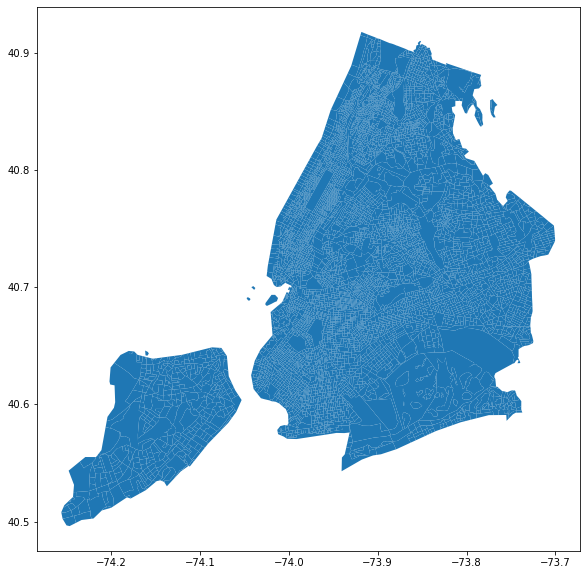

In [5]:
cbg_grids_name = "cb_2021_36_bg_500k.shp"
nyc_geoids, cbgs_nyc = read_grids(cbg_grids_name, grid_name = 'Census Blocks')
cbgs_nyc.head(3)

we have 263 unique taxi zones


,borough,location_i,objectid,shape_area,shape_leng,zone,geometry
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."


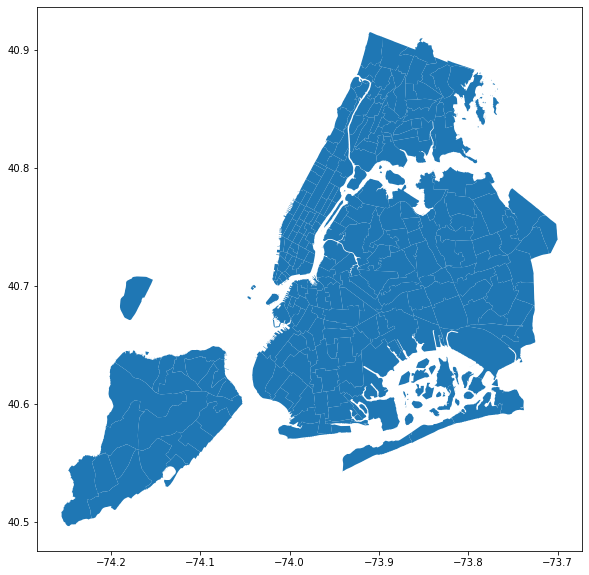

In [6]:
taxi_grids_name = "geo_export_e612eba5-03f4-49f0-a0ac-528f1c3802b8.shp"
taxi_zones = read_grids(taxi_grids_name, grid_name = 'taxi zones')
taxi_zones.head(3)

# Step 3) Grid coarsening: Census Block Group grids onto Taxi zones

In [7]:
cbgs_nyc = map_to_taxiZones(cbgs_nyc, taxi_zones)
cbgs_nyc.head(3)

6758
0


/home/sevin/Desktop/spring2023/TA_art_of_engineering/repository/art_of_engineering_course/grid_mapper.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbgs_nyc['taxi_object_id'][i] = taxi_obj_id
/home/sevin/Desktop/spring2023/TA_art_of_engineering/repository/art_of_engineering_course/grid_mapper.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbgs_nyc['taxi_geometry'][i] =  taxi_poly


1000
2000
3000
4000
5000
6000


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,NAMELSAD,LSAD,ALAND,AWATER,geometry,taxi_object_id,taxi_geometry
0,36,081,093401,2,1500000US360810934012,360810934012,2,Block Group 2,BG,132716,0,"POLYGON ((-73.84400 40.57951, -73.84305 40.577...",201.0,"POLYGON ((-73.81849901800001 40.5873623529999,..."
1,36,061,013502,0,1500000US360610135020,360610135020,0,Block Group 0,BG,0,248165,"POLYGON ((-74.00162 40.77455, -74.00045 40.776...",None,None
2,36,005,051601,2,1500000US360050516012,360050516012,2,Block Group 2,BG,256313,0,"POLYGON ((-73.79188 40.85522, -73.78743 40.849...",46.0,(POLYGON ((-73.78452431937963 40.8604770631478...


## Step 4) Read attraction grid

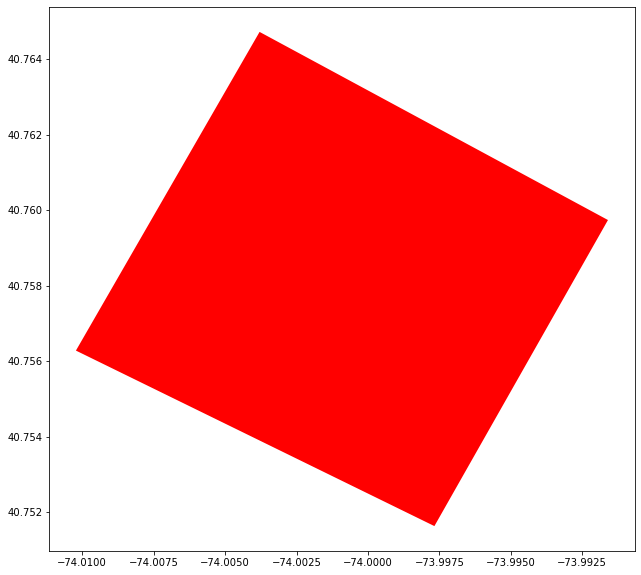

In [8]:
grids_name = "Hudson_Yards_Cut.shp"
attraction_zone = read_grids(grids_name, grid_name = 'attraction')


<AxesSubplot:>

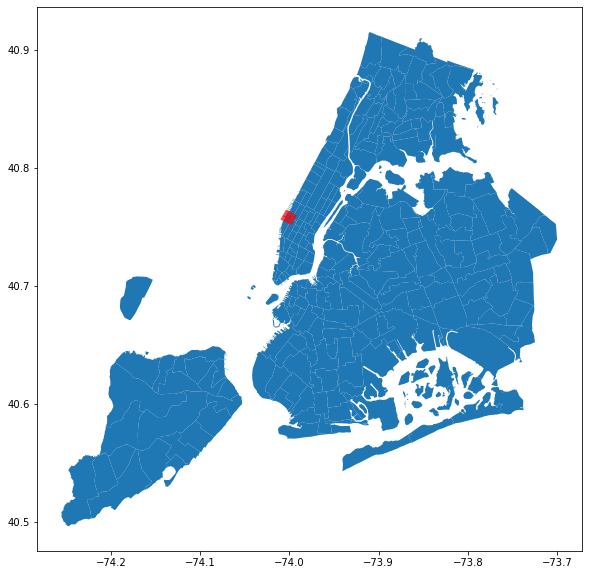

In [9]:
fig, ax = plt.subplots(figsize = (10,10))
taxi_zones.plot(ax=ax) #, column='objectid'
attraction_zone.plot(ax=ax, color='red', alpha=0.7)

## Step 5) Count visitors per grid

In [10]:
geo_data = geo_data[geo_data.within(attraction_zone.loc[0,'geometry'])]
geo_data = geo_data[~geo_data['visitor_home_cbgs'].isna()][['location_name','visitor_home_cbgs']] #clean data
visits = count_visits(geo_data, nyc_geoids)
visits.head(4)

There are visitors from 1835 unique cbgs zone


,geoid,visitor_cnt
0,360610103001,166
1,360610115001,111
2,360610111001,103
3,360810263001,21


In [11]:
merged = pd.merge(cbgs_nyc, visits, left_on = 'GEOID', right_on = 'geoid', how = 'right' )[['taxi_object_id','visitor_cnt','geometry','geoid','GEOID']]
merged = merged[~merged['taxi_object_id'].isna()]
merged.head(2)

,taxi_object_id,visitor_cnt,geometry,geoid,GEOID
0,68.0,166,"POLYGON ((-73.99963 40.75392, -73.99914 40.754...",360610103001,360610103001
1,48.0,111,"POLYGON ((-73.99356 40.75714, -73.99263 40.758...",360610115001,360610115001


In [12]:
visitor_counts = pd.DataFrame(merged.groupby('taxi_object_id').sum()['visitor_cnt']).reset_index(drop=False)
visitor_counts = pd.merge(taxi_zones, visitor_counts, left_on='objectid', right_on='taxi_object_id', how='right' )  
visitor_counts.head(3)

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry,taxi_object_id,visitor_cnt
0,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",3.0,12
1,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",4.0,36
2,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562...",5.0,14


<AxesSubplot:>

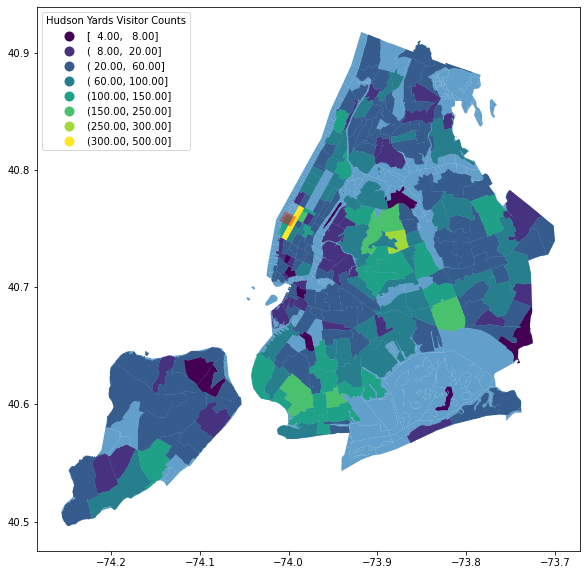

In [38]:
# %matplotlib qt
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))
cbgs_nyc.plot(ax=ax, alpha=0.7) #, column='objectid'

tmp = visitor_counts[~visitor_counts['geometry'].isna()] #viridis, RdBu
# bins = mapclassify.Quantiles(tmp['cnt'], k=5).bins
tmp.plot(column = 'visitor_cnt', ax = ax, legend=True, cmap='viridis',legend_kwds={'loc': 'upper left'},
        scheme ='User_Defined', #quantiles
        classification_kwds =dict(bins=[ 8,20, 60, 100, 150, 250,300, 500])) #[4, 8, 50, 100, 200, merged['cnt'].max()]
ax.get_legend().set_title("Hudson Yards Visitor Counts")
attraction_zone.plot(ax=ax, color='red', alpha = 0.4)

# Module 2

## create taxi passenger counts per taxi zone

### We will repeat the same task for taxi data to obtain taxi trip passengers count per region (the count will be per pick up zone)

In [14]:
taxi_data = pd.read_parquet('data/yellow_tripdata_2022-12.parquet')
print('1-month taxi data count ', len(taxi_data))
taxi_data.head(3)

1-month taxi data count  3399549


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-12-01 00:37:35,2022-12-01 00:47:35,1.0,2.0,1.0,N,170,237,1,8.5,3.00,0.5,3.10,0.0,0.3,15.40,2.5,0.00
1,1,2022-12-01 00:34:35,2022-12-01 00:55:21,0.0,8.4,1.0,N,138,141,2,26.0,4.25,0.5,0.00,0.0,0.3,31.05,2.5,1.25
2,1,2022-12-01 00:33:26,2022-12-01 00:37:34,1.0,0.8,1.0,N,140,140,1,5.0,3.00,0.5,1.76,0.0,0.3,10.56,2.5,0.00


### extract unique zone ids that are within the attraction zone

In [15]:
AttDO_zones = taxi_zones[taxi_zones.intersects(attraction_zone.loc[0,'geometry'])]
AttDO_zones

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry
47,Manhattan,48.0,48.0,0.000094,0.043747,Clinton East,"POLYGON ((-73.99118 40.75533, -73.99163 40.754..."
49,Manhattan,50.0,50.0,0.000173,0.055748,Clinton West,"POLYGON ((-73.99668 40.77351, -73.99434 40.772..."
68,Manhattan,68.0,68.0,0.000111,0.049337,East Chelsea,"POLYGON ((-74.00202 40.74044, -74.00252 40.739..."
248,Manhattan,246.0,246.0,0.000281,0.069467,West Chelsea/Hudson Yards,"POLYGON ((-74.00440 40.76267, -74.00220 40.761..."


<AxesSubplot:>

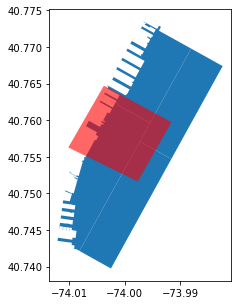

In [16]:
fig, ax = plt.subplots(figsize = (5,5))
AttDO_zones.plot(ax = ax)
attraction_zone.plot(ax=ax, color='red', alpha = 0.6)

In [17]:
AttDO_zones_ids = AttDO_zones['objectid'].unique().tolist()
print('taxi zone IDs within the attraction region: ', AttDO_zones_ids)


taxi zone IDs within the attraction region:  [48.0, 50.0, 68.0, 246.0]


### Extract taxi data with drop off within and in the visinity of Hudson Yards

In [18]:
taxi_data = taxi_data[taxi_data['DOLocationID'].isin(AttDO_zones_ids)] # AttDO: attraction drop off zone id
taxi_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
11,1,2022-12-01 00:41:01,2022-12-01 00:44:17,1.0,0.50,1.0,N,48,68,1,4.50,3.0,0.5,1.65,0.0,0.3,9.95,2.5,0.0
43,2,2022-12-01 00:41:13,2022-12-01 00:45:32,1.0,1.09,1.0,N,100,48,1,5.50,0.5,0.5,1.86,0.0,0.3,11.16,2.5,0.0
45,2,2022-12-01 00:20:52,2022-12-01 00:27:07,1.0,1.69,1.0,N,249,68,1,7.00,0.5,0.5,2.16,0.0,0.3,12.96,2.5,0.0
71,2,2022-12-01 00:00:54,2022-12-01 00:07:55,1.0,3.00,1.0,N,151,50,1,10.50,0.5,0.5,2.86,0.0,0.3,17.16,2.5,0.0
72,1,2022-12-01 00:23:06,2022-12-01 00:32:39,1.0,2.10,1.0,N,238,50,1,9.50,3.0,0.5,2.65,0.0,0.3,15.95,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399506,2,2022-12-31 23:34:47,2022-12-31 23:35:13,NaN,0.00,NaN,None,50,50,0,27.21,0.0,0.5,0.00,0.0,1.0,31.21,NaN,NaN
3399529,2,2022-12-31 23:24:00,2022-12-31 23:34:00,NaN,1.56,NaN,None,142,50,0,17.65,0.0,0.5,4.33,0.0,1.0,25.98,NaN,NaN
3399540,2,2022-12-31 23:01:46,2022-12-31 23:26:45,NaN,3.97,NaN,None,107,50,0,23.55,0.0,0.5,5.51,0.0,1.0,33.06,NaN,NaN
3399542,2,2022-12-31 23:06:51,2022-12-31 23:17:08,NaN,0.91,NaN,None,68,48,0,17.65,0.0,0.5,4.33,0.0,1.0,25.98,NaN,NaN


In [19]:
trip_passenger_counts = pd.DataFrame(taxi_data.groupby('PULocationID').sum()['passenger_count']).reset_index(drop=False)
trip_passenger_counts

,PULocationID,passenger_count
0,1,1.0
1,4,251.0
2,5,1.0
3,7,26.0
4,10,149.0
...,...,...
197,261,3594.0
198,262,1340.0
199,263,2532.0
200,264,3392.0


In [20]:
visitor_counts_wTaxi_use = pd.merge(visitor_counts, trip_passenger_counts, left_on = 'taxi_object_id', right_on = 'PULocationID', how = 'left' )
print(len(visitor_counts_wTaxi_use))
visitor_counts_wTaxi_use.head(2)

227


,borough,location_i,objectid,shape_area,shape_leng,zone,geometry,taxi_object_id,visitor_cnt,PULocationID,passenger_count
0,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",3.0,12,NaN,NaN
1,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",4.0,36,4.0,251.0


<AxesSubplot:>

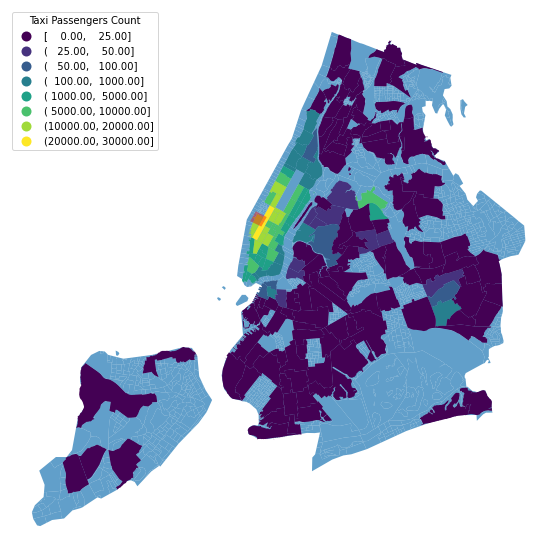

In [33]:
# %matplotlib qt
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))
plt.axis('off')
cbgs_nyc.plot(ax=ax, alpha=0.7) #, column='objectid'

visitor_counts_wTaxi_use.plot(column = 'passenger_count', ax = ax, legend=True, cmap='viridis',legend_kwds={'loc': 'upper left'},
        scheme = 'User_Defined', #quantiles
        classification_kwds =dict(bins=[ 25,50,100, 1000,5000, 10000, 20000, 30000])) #[4, 8, 50, 100, 200, merged['cnt'].max()]
ax.get_legend().set_title("Taxi Passengers Count")
attraction_zone.plot(ax=ax, color='red', alpha = 0.4)


### Now we can compare the taxi flow (passenger counts) with visitors flow (or visitors counts) coming from diffirent origin locations to Hudson Yards

### we can show this by the ratio of passenger counts over visitor counts

In [34]:
comparison_data = visitor_counts_wTaxi_use[['taxi_object_id',	'visitor_cnt','passenger_count', 'geometry']]
comparison_data['ratio'] = comparison_data['passenger_count']/comparison_data['visitor_cnt']
comparison_data

/home/sevin/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,taxi_object_id,visitor_cnt,passenger_count,geometry,ratio
0,3.0,12,NaN,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",NaN
1,4.0,36,251.0,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",6.972222
2,5.0,14,1.0,"POLYGON ((-74.17422 40.56257, -74.17349 40.562...",0.071429
3,6.0,48,NaN,"POLYGON ((-74.06367 40.60220, -74.06351 40.602...",NaN
4,7.0,132,26.0,"POLYGON ((-73.90414 40.76752, -73.90325 40.767...",0.196970
...,...,...,...,...,...
222,259.0,40,4.0,"POLYGON ((-73.85107 40.91037, -73.85207 40.909...",0.100000
223,260.0,197,15.0,"POLYGON ((-73.90175 40.76078, -73.90147 40.759...",0.076142
224,261.0,32,3594.0,"POLYGON ((-74.01333 40.70503, -74.01327 40.704...",112.312500
225,262.0,53,1340.0,"MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ...",25.283019


## Question: what do the larger ratio values mean?

<AxesSubplot:>

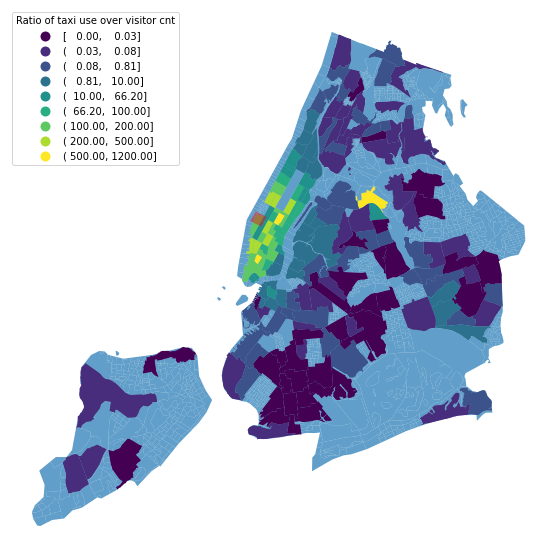

In [36]:
# %matplotlib qt
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))
cbgs_nyc.plot(ax=ax, alpha=0.7) 
plt.axis('off')

comparison_data.plot(column = 'ratio', ax = ax, legend=True, cmap='viridis',legend_kwds={'loc': 'upper left'},
        scheme = 'User_Defined', #, #quantiles, User_Defined
        classification_kwds =dict(bins=[ 0.03, 0.08, 0.81,10, 66.2, 100, 200, 500, 1200])) #[4, 8, 50, 100, 200, merged['cnt'].max()]
ax.get_legend().set_title("Ratio of taxi use over visitor cnt")
attraction_zone.plot(ax=ax, color='red', alpha = 0.4)